Using TensorFlow backend.


Epoch 1/30
5/4 [==============================] - 23s 5s/step - loss: 1.4061 - acc: 0.2633 - val_loss: 1.3863 - val_acc: 0.1923
Epoch 2/30
5/4 [==============================] - 22s 4s/step - loss: 1.3866 - acc: 0.2611 - val_loss: 1.3813 - val_acc: 0.2885
Epoch 3/30
5/4 [==============================] - 22s 4s/step - loss: 1.3751 - acc: 0.2061 - val_loss: 1.3780 - val_acc: 0.2692
Epoch 4/30
5/4 [==============================] - 22s 4s/step - loss: 1.3589 - acc: 0.3095 - val_loss: 1.3547 - val_acc: 0.2308
Epoch 5/30
5/4 [==============================] - 22s 4s/step - loss: 1.3228 - acc: 0.3737 - val_loss: 1.3109 - val_acc: 0.3269
Epoch 6/30
5/4 [==============================] - 22s 4s/step - loss: 1.2641 - acc: 0.3911 - val_loss: 1.2800 - val_acc: 0.3462
Epoch 7/30
5/4 [==============================] - 22s 4s/step - loss: 1.2579 - acc: 0.4365 - val_loss: 1.2736 - val_acc: 0.3269
Epoch 8/30
5/4 [==============================] - 22s 4s/step - loss: 1.1744 - acc: 0.4867 - val_loss: 1

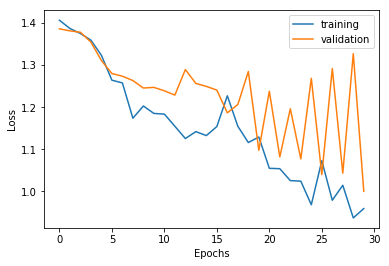

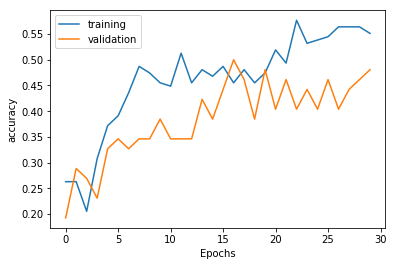

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import time
from keras.utils import np_utils
DATADIR = "C:/Users/Muhammad Zubair Khan/Downloads/Compressed/diaretdb1_v_1_1/ddb1_fundusimages"
CATEGORIES = ["Normal", "DR1", "DR2", "DR3"]

img_size = 100
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_img = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_img, class_num])
            except Exception as e:
                pass
            
            
create_training_data()

from keras import backend as k
import random
random.shuffle(training_data)

x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)
            
from keras.utils import np_utils
x = np.array(x).reshape(-1, img_size, img_size, 3)
x = x/255.0
y=np_utils.to_categorical(y, 4) 
      
         
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y)

from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD
import matplotlib.pyplot as plt
%matplotlib inline
epochs = 30
batch_size = 32
filter_size = 3
pool_size = 2
num_filters = 64

model = Sequential()
model.add(Conv2D(num_filters, (filter_size, filter_size), padding='valid', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(num_filters, (filter_size, filter_size), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))
model.add(Conv2D(num_filters, (filter_size, filter_size), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))
model.add(Conv2D(num_filters, (filter_size, filter_size), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
datagen = ImageDataGenerator(
        rotation_range=10.,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.,
        zoom_range=.1,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(x_train)


history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=epochs, validation_data=(x_val, y_val), verbose=1)


def plot_history(value):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel("Loss")
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['training', 'validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel("accuracy")
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(['training', 'validation'])
    plt.show()
    
plot_history(history)
#loss, accuracy =model.evaluate(x_val, y_val, verbose=0)
#print(loss)
#print(accuracy)


In [3]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = model.predict(x_val)
import numpy as np
y_pred = model.predict_classes(x_val)
target_names = ['class 0(Normal)', 'class 1(DR1)', 'class 2(DR2)', 'Class 3(DR3)']
print(classification_report(np.argmax(y_val, axis=1), y_pred, target_names=target_names))
print(confusion_matrix(np.argmax(y_val, axis=1), y_pred))


                 precision    recall  f1-score   support

class 0(Normal)       0.50      0.73      0.59        11
   class 1(DR1)       1.00      0.67      0.80        12
   class 2(DR2)       0.42      0.42      0.42        19
   Class 3(DR3)       0.11      0.10      0.11        10

      micro avg       0.48      0.48      0.48        52
      macro avg       0.51      0.48      0.48        52
   weighted avg       0.51      0.48      0.48        52

[[8 0 3 0]
 [1 8 0 3]
 [6 0 8 5]
 [1 0 8 1]]
